In [1]:
import pandas as pd
import glob
import numpy as np
import os, sys
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

In [2]:
def compute_correlations(x, y):
    # Compute Pearson correlation
    pearson_r, pearson_p = pearsonr(x, y)
    pearson_r2 = pearson_r ** 2
    # Compute Spearman correlation
    spearman_r, spearman_p = spearmanr(x, y)
    spearman_r2 = spearman_r ** 2
    return {'Pearson': {'r': pearson_r, 'r^2': pearson_r2, 'p-value': pearson_p},
            'Spearman': {'r': spearman_r, 'r^2': spearman_r2, 'p-value': spearman_p}}

In [7]:
def plot_cpdm_vs_crdm(df, ax):
    
    for i in range(4):
        x = df['meta_crdm']
        y = df['meta_cpdm_b{}'.format(i+1)]
        ax[i//2, i%2].scatter(x, y)
        if (i>=2):
            ax[i//2, i%2].set_xlabel("CRDM Meta-Uncertainty")
        ax[i//2, i%2].set_ylabel("CPDM Block {} Meta-Uncertainty".format(i+1))
        m, b = np.polyfit(x, y, 1)
        ax[i//2, i%2].plot(x, m*x+b,"r-")
        corr = compute_correlations(x, y)
        ax[i//2, i%2].set_title(f"Pearson r: {corr['Pearson']['r']:.2f}, p-value: {corr['Pearson']['p-value']:.2e}\nSpearman r: {corr['Spearman']['r']:.2f}, p-value: {corr['Spearman']['p-value']:.2e}")

In [11]:
def plot_cpdm_vs_cdd(df, ax):
    
    for i in range(4):
        x = df['meta_cdd']
        y = df['meta_cpdm_b{}'.format(i+1)]
        ax[i//2, i%2].scatter(x, y)
        if (i>=2):
            ax[i//2, i%2].set_xlabel("CDD Meta-Uncertainty")
        ax[i//2, i%2].set_ylabel("CPDM Block {} Meta-Uncertainty".format(i+1))
        m, b = np.polyfit(x, y, 1)
        ax[i//2, i%2].plot(x, m*x+b,"r-")
        corr = compute_correlations(x, y)
        ax[i//2, i%2].set_title(f"Pearson r: {corr['Pearson']['r']:.2f}, p-value: {corr['Pearson']['p-value']:.2e}\nSpearman r: {corr['Spearman']['r']:.2f}, p-value: {corr['Spearman']['p-value']:.2e}")

In [8]:
#root_dir = "C:/Users/govild2"
#files = glob.glob(os.path.join(root_dir,"*"))
#print(files)

['C:/Users/govild2\\3D Objects', 'C:/Users/govild2\\Anaconda3', 'C:/Users/govild2\\AppData', 'C:/Users/govild2\\Application Data', 'C:/Users/govild2\\Contacts', 'C:/Users/govild2\\Cookies', 'C:/Users/govild2\\Desktop', 'C:/Users/govild2\\Documents', 'C:/Users/govild2\\Downloads', 'C:/Users/govild2\\Favorites', 'C:/Users/govild2\\IntelGraphicsProfiles', 'C:/Users/govild2\\Links', 'C:/Users/govild2\\Local Settings', 'C:/Users/govild2\\Music', 'C:/Users/govild2\\My Documents', 'C:/Users/govild2\\National Institutes of Health', 'C:/Users/govild2\\NetHood', 'C:/Users/govild2\\NTUSER.DAT', 'C:/Users/govild2\\ntuser.dat.LOG1', 'C:/Users/govild2\\ntuser.dat.LOG2', 'C:/Users/govild2\\NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TM.blf', 'C:/Users/govild2\\NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TMContainer00000000000000000001.regtrans-ms', 'C:/Users/govild2\\NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TMContainer00000000000000000002.regtrans-ms', 'C:/Users/govild2\\ntuser.ini'

In [5]:
#create all data frames
#root dir for mac
#root_dir = "/Users/govild2/National Institutes of Health/NIMH CDN lab - Documents/Experiments/1-Data/IDM/IDM-CloudResearch/"
#root dir for windows
root_dir = "C:/Users/govild2/National Institutes of Health/NIMH CDN lab - Documents/Datasets/IDM/IDM-CloudResearch"
conf_dir = os.path.join(root_dir,"Confidence_analysis/CASENDRE_output")
value_dir = os.path.join(root_dir,"IDM_Model_Output")

tasks = ['crdm','cdd','cpdm_block_1','cpdm_block_2','cpdm_block_3','cpdm_block_4']
batches = ["Batch_1_2","Batch_3","Batch_4"]

df_batches = []

for task in tasks:
    frames = []
    for batch in batches:
        idf = pd.read_csv(os.path.join(conf_dir,batch,"{}_metauncertainty_by_subject.csv".format(task)))
        frames = frames + [idf]
    df_batch = pd.concat(frames,ignore_index=True)
    df_batches = df_batches + [df_batch]

[df_crdm_batches,df_cdd_batches,df_cpdm_b1_batches,df_cpdm_b2_batches,df_cpdm_b3_batches,df_cpdm_b4_batches] = df_batches

frames = []
for batch in batches:
    idf = pd.read_csv(os.path.join(value_dir,batch,"{}_CRDM_analysis.csv".format(batch)))
    frames = frames + [idf]
df_total_CRDM_analysis = pd.concat(frames,ignore_index=True)

In [9]:
#combine dfs
#cdd
df_aggregate = df_cdd_batches
df_aggregate = df_aggregate.rename(columns={'meta_uncertainty':'meta_cdd'})

#crdm

df_aggregate['meta_crdm'] = df_crdm_batches.loc[df_crdm_batches['subject']==df_aggregate['subject'],'meta_uncertainty']

#cpdm
#cpdm block 1

df_aggregate['meta_cpdm_b1'] = df_cpdm_b1_batches.loc[df_cpdm_b1_batches['subject']==df_aggregate['subject'],'meta_uncertainty']

#cpdm block 2

df_aggregate['meta_cpdm_b2'] = df_cpdm_b2_batches.loc[df_cpdm_b2_batches['subject']==df_aggregate['subject'],'meta_uncertainty']

#cpdm block 3

df_aggregate['meta_cpdm_b3'] = df_cpdm_b3_batches.loc[df_cpdm_b3_batches['subject']==df_aggregate['subject'],'meta_uncertainty']

#cpdm block 4

df_aggregate['meta_cpdm_b4'] = df_cpdm_b4_batches.loc[df_cpdm_b4_batches['subject']==df_aggregate['subject'],'meta_uncertainty']

#print(df_aggregate)
#CRDM analyses (beta parameter)
df_total_CRDM_analysis = df_total_CRDM_analysis.sort_values(by=['subject']).reset_index(drop=True)
#print(df_total_CRDM_analysis)
df_aggregate = df_aggregate.sort_values(by=['subject']).reset_index(drop=True)
df_aggregate['beta'] = df_total_CRDM_analysis.loc[df_total_CRDM_analysis['subject']==df_aggregate['subject'],'beta']

print(df_aggregate)
#print(df_total_CRDM_analysis['subject'])
#print(df_aggregate['subject']) 

                           subject  meta_cdd  meta_crdm  meta_cpdm_b1  \
0          2023-02-15_16h52.30.817  1.849795   0.794381      0.554847   
1          2023-02-15_19h21.34.004  3.159738   3.285129     -0.517764   
2          2023-02-16_06h37.57.554  1.392724   1.392724      0.042016   
3                2023_05h14.47.829  0.343135   0.343135      0.409341   
4                2023_07h19.20.292  4.770927   4.770927      2.926460   
..                             ...       ...        ...           ...   
68  idm-v2_2023-02-23_18h24.45.747  1.456226   3.942905      0.142833   
69  idm-v2_2023-02-23_21h21.16.077  2.464399   0.594117      2.126070   
70  idm-v2_2023-02-23_22h57.50.523  1.302746   1.302746      1.299606   
71  idm-v2_2023-02-24_06h01.38.532  1.861603   2.392631      2.795078   
72  idm-v2_2023-02-24_10h56.00.832  4.999998   2.418044      1.586980   

    meta_cpdm_b2  meta_cpdm_b3  meta_cpdm_b4          beta  
0       0.192868      0.341326      0.514202  6.349688e-01  
1

2x2 subplot of each CPDM block 1-4 versus CRDM

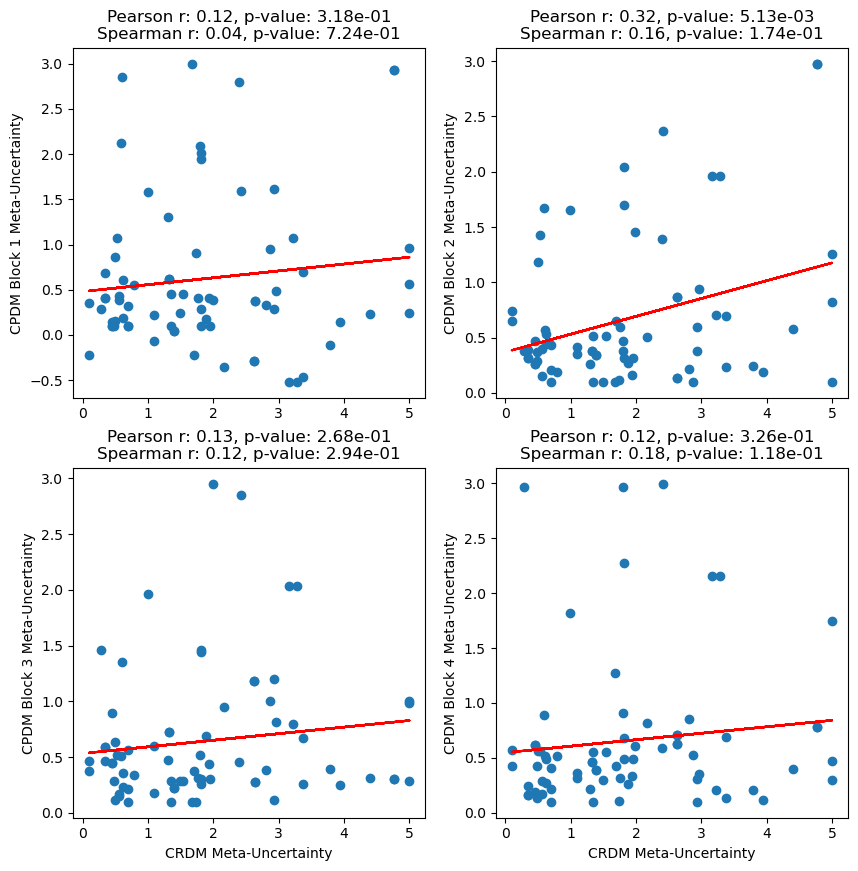

In [10]:
fig, ax = plt.subplots(2, 2,figsize=(10,10))
plot_cpdm_vs_crdm(df_aggregate,ax)

1x1 plot of the average across all blocks for CPDM versus CRDM

In [13]:
cols = ['meta_cpdm_b1','meta_cpdm_b2','meta_cpdm_b3','meta_cpdm_b4']
df_aggregate['meta_cpdm_avg'] = np.mean(df_aggregate[cols],axis=1)
print(df_aggregate)

                           subject  meta_cdd  meta_crdm  meta_cpdm_b1  \
0          2023-02-15_16h52.30.817  1.849795   0.794381      0.554847   
1          2023-02-15_19h21.34.004  3.159738   3.285129     -0.517764   
2          2023-02-16_06h37.57.554  1.392724   1.392724      0.042016   
3                2023_05h14.47.829  0.343135   0.343135      0.409341   
4                2023_07h19.20.292  4.770927   4.770927      2.926460   
..                             ...       ...        ...           ...   
68  idm-v2_2023-02-23_18h24.45.747  1.456226   3.942905      0.142833   
69  idm-v2_2023-02-23_21h21.16.077  2.464399   0.594117      2.126070   
70  idm-v2_2023-02-23_22h57.50.523  1.302746   1.302746      1.299606   
71  idm-v2_2023-02-24_06h01.38.532  1.861603   2.392631      2.795078   
72  idm-v2_2023-02-24_10h56.00.832  4.999998   2.418044      1.586980   

    meta_cpdm_b2  meta_cpdm_b3  meta_cpdm_b4          beta  meta_cpdm_avg  
0       0.192868      0.341326      0.514202  6

Text(0.5, 1.0, 'Pearson r: 0.24, p-value: 4.41e-02\nSpearman r: 0.19, p-value: 1.02e-01')

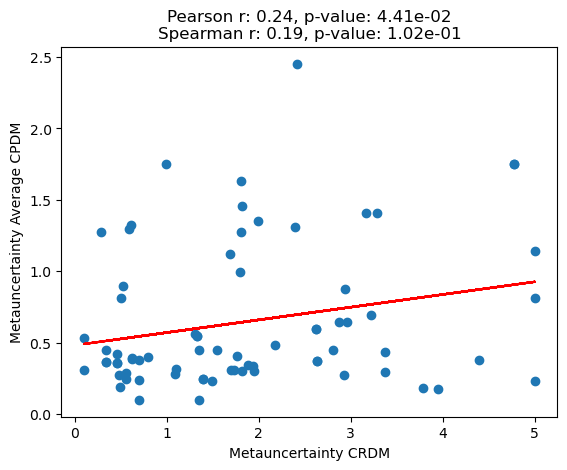

In [14]:
x = df_aggregate['meta_crdm']
y = df_aggregate['meta_cpdm_avg']
plt.scatter(x, y)
plt.xlabel("Metauncertainty CRDM")
plt.ylabel("Metauncertainty Average CPDM")
corr = compute_correlations(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b,"r-")
plt.title(f"Pearson r: {corr['Pearson']['r']:.2f}, p-value: {corr['Pearson']['p-value']:.2e}\nSpearman r: {corr['Spearman']['r']:.2f}, p-value: {corr['Spearman']['p-value']:.2e}")

2x2 subplot of each CPDM block 1-4 versus CDD

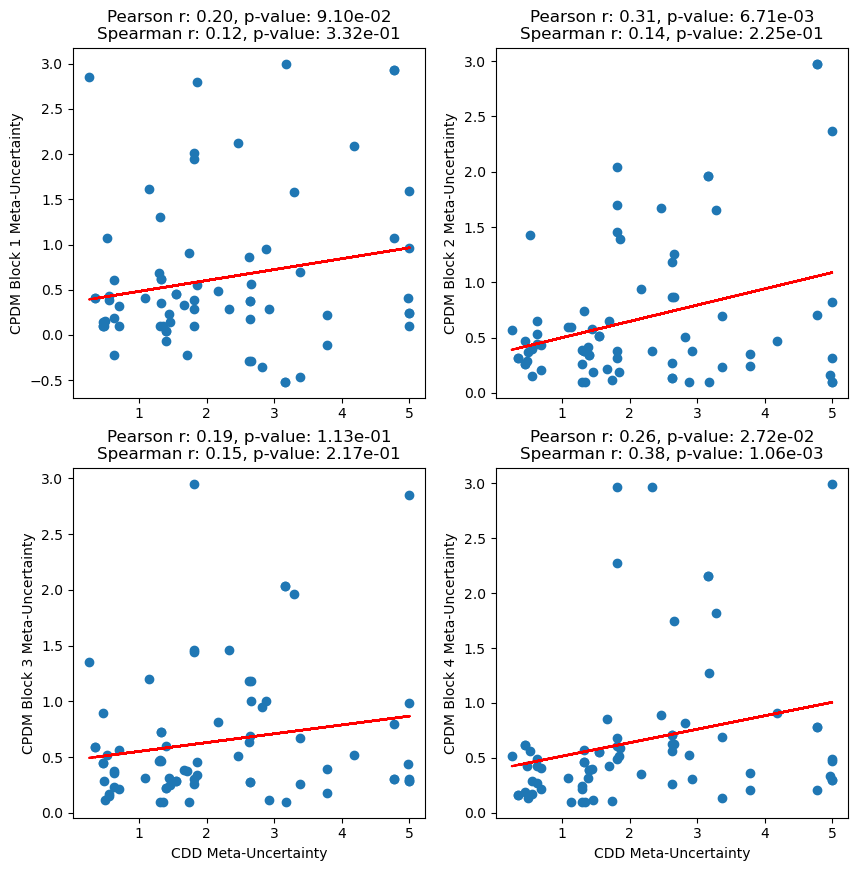

In [12]:
fig, ax = plt.subplots(2, 2,figsize=(10,10))
plot_cpdm_vs_cdd(df_aggregate,ax)

1x1 plot of the average across all blocks for CPDM versus CDD

Text(0.5, 1.0, 'Pearson r: 0.33, p-value: 4.12e-03\nSpearman r: 0.25, p-value: 2.96e-02')

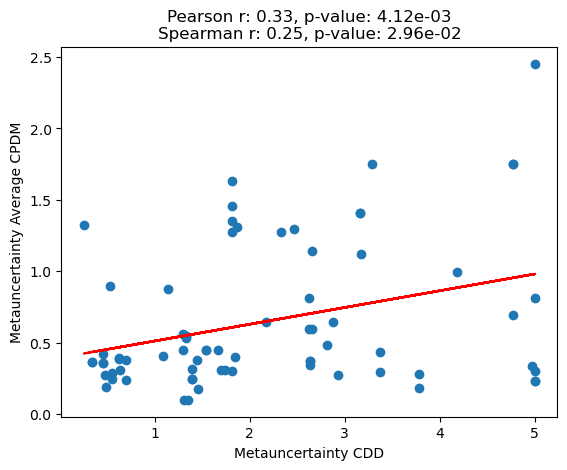

In [15]:
x = df_aggregate['meta_cdd']
y = df_aggregate['meta_cpdm_avg']
plt.scatter(x, y)
plt.xlabel("Metauncertainty CDD")
plt.ylabel("Metauncertainty Average CPDM")
corr = compute_correlations(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b,"r-")
plt.title(f"Pearson r: {corr['Pearson']['r']:.2f}, p-value: {corr['Pearson']['p-value']:.2e}\nSpearman r: {corr['Spearman']['r']:.2f}, p-value: {corr['Spearman']['p-value']:.2e}")

1x1 plot of CRDM vs CDD Meta-Uncertainty

Text(0.5, 1.0, 'Pearson r: 0.64, p-value: 9.76e-10\nSpearman r: 0.71, p-value: 2.55e-12')

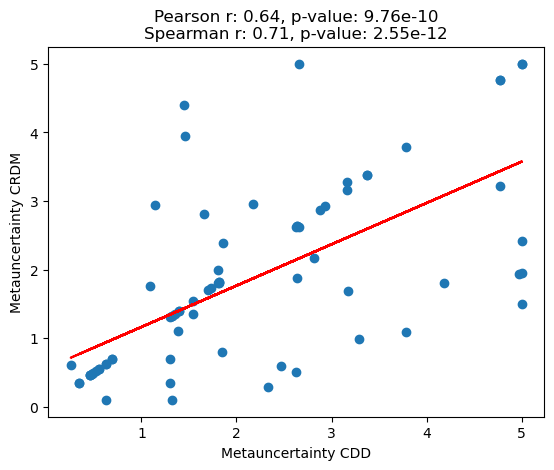

In [17]:
x = df_aggregate['meta_cdd']
y = df_aggregate['meta_crdm']
plt.scatter(x, y)
plt.xlabel("Metauncertainty CDD")
plt.ylabel("Metauncertainty CRDM")
corr = compute_correlations(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b,"r-")
plt.title(f"Pearson r: {corr['Pearson']['r']:.2f}, p-value: {corr['Pearson']['p-value']:.2e}\nSpearman r: {corr['Spearman']['r']:.2f}, p-value: {corr['Spearman']['p-value']:.2e}")

1x1 plot of CRDM Meta-Uncertainty versus the Beta parameter (ambiguity aversion)

Text(0.5, 1.0, 'Pearson r: 0.01, p-value: 9.50e-01\nSpearman r: 0.07, p-value: 5.47e-01')

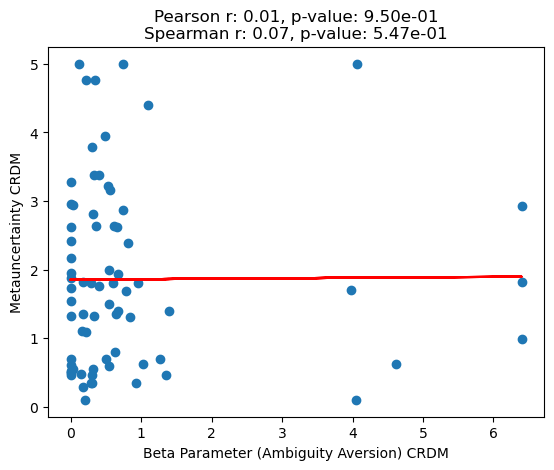

In [18]:
x = df_aggregate['beta']
y = df_aggregate['meta_crdm']
plt.scatter(x, y)
plt.xlabel("Beta Parameter (Ambiguity Aversion) CRDM")
plt.ylabel("Metauncertainty CRDM")
corr = compute_correlations(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b,"r-")
plt.title(f"Pearson r: {corr['Pearson']['r']:.2f}, p-value: {corr['Pearson']['p-value']:.2e}\nSpearman r: {corr['Spearman']['r']:.2f}, p-value: {corr['Spearman']['p-value']:.2e}")

1x1 plot of CPDM Meta-Uncertainty versus the Beta parameter (ambiguity aversion)

Text(0.5, 1.0, 'Pearson r: -0.03, p-value: 7.86e-01\nSpearman r: -0.06, p-value: 6.30e-01')

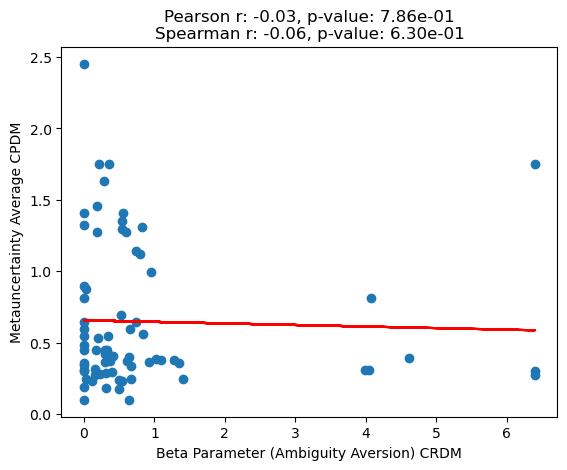

In [19]:
x = df_aggregate['beta']
y = df_aggregate['meta_cpdm_avg']
plt.scatter(x, y)
plt.xlabel("Beta Parameter (Ambiguity Aversion) CRDM")
plt.ylabel("Metauncertainty Average CPDM")
corr = compute_correlations(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b,"r-")
plt.title(f"Pearson r: {corr['Pearson']['r']:.2f}, p-value: {corr['Pearson']['p-value']:.2e}\nSpearman r: {corr['Spearman']['r']:.2f}, p-value: {corr['Spearman']['p-value']:.2e}")